In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv", encoding="iso-8859-1")

In [3]:
data.shape

(9656, 66)

In [4]:
data.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [5]:
data.describe()

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


# Outlier Elimination by flooring and capping

In [6]:
data.groupby("Area").apply

<bound method GroupBy.apply of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000011BEBE5EB50>>

In [7]:
years = data.columns[7:]

In [8]:
areas = data["Area"].unique()

In [9]:
len(areas)

284

In [10]:
n = 0
for i in years:
    for j in areas:
        lower_limit = data[i][(data["Element"] == "Temperature change") & (data["Area"] == j)].quantile(0.25)
        upper_limit = data[i][(data["Element"] == "Temperature change") & (data["Area"] == j)].quantile(0.75)
        data.loc[data["Area"] == j, i] = data.loc[data["Area"] == j, i].clip(lower = lower_limit, upper = upper_limit)

In [11]:
data.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.600,0.062,1.164,...,2.467,1.179,-0.467,1.233,1.000,1.589,2.296,1.201,1.815,1.426
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,0.600,0.292,1.164,...,1.950,1.712,0.909,1.691,1.000,1.589,1.950,1.789,1.815,1.426
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-0.540,0.292,1.164,...,1.212,0.748,-0.467,1.494,0.005,1.589,2.251,0.901,1.815,0.593
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,0.600,0.292,1.164,...,2.467,1.712,0.909,1.691,1.000,1.589,2.296,1.789,1.815,1.426
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,0.292,0.403,...,2.467,0.748,-0.467,1.691,0.005,0.589,2.296,0.901,1.815,0.593


# Null Values

In [12]:
data.isnull().sum()

Area Code          0
Area               0
Months Code        0
Months             0
Element Code       0
                ... 
Y2015           1295
Y2016           1308
Y2017           1290
Y2018           1307
Y2019           1291
Length: 66, dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.isnull().sum()

Area Code       0
Area            0
Months Code     0
Months          0
Element Code    0
               ..
Y2015           0
Y2016           0
Y2017           0
Y2018           0
Y2019           0
Length: 66, dtype: int64

In [15]:
data.shape

(6760, 66)

# Remove Unnecesary Features

In [16]:
data =  data.drop(["Area Code", "Months Code", "Element Code", "Unit"], axis=1)

# Visualization

## Change in Temperature with Year

C:\Users\fahmh\AppData\Local\Temp\ipykernel_20412\527826103.py:8: MatplotlibDeprecationWarning: Passing label as a length 59 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(area_temp_mean.loc[areas[i]], label=years)


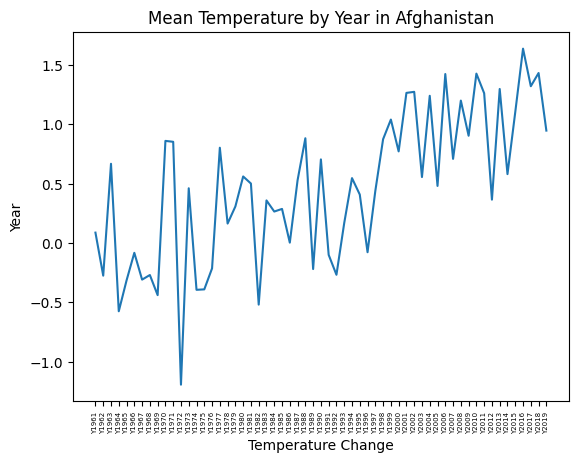

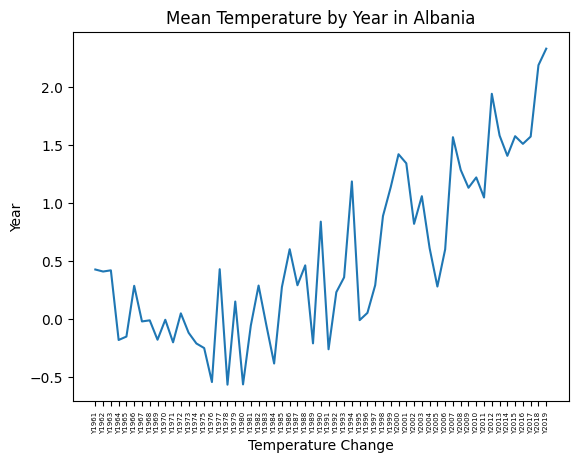

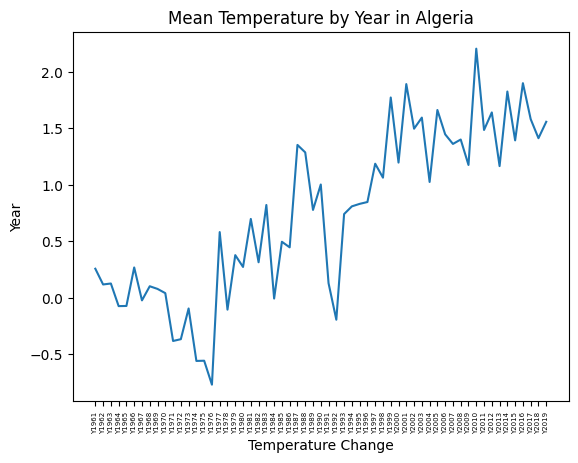

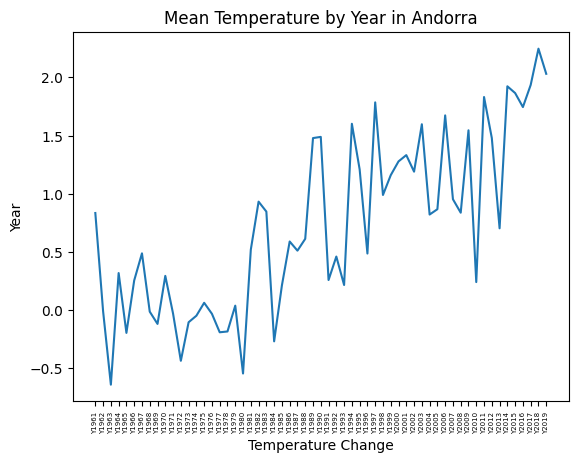

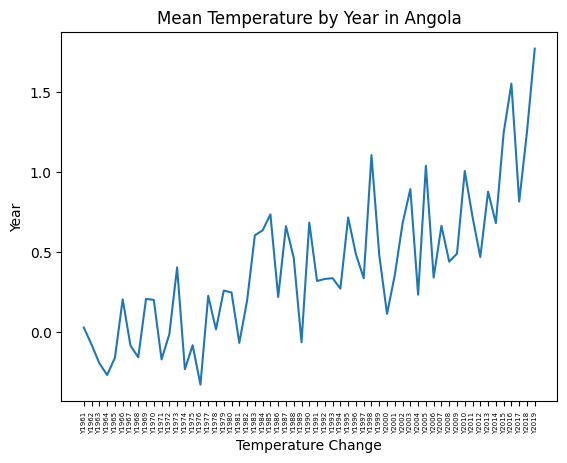

In [17]:
area_temp = data[data["Element"] == "Temperature change"]
area_temp = area_temp.drop(columns=["Months", "Element"])
area_temp_mean = area_temp.groupby('Area').mean()
years = area_temp.columns[1:]
areas = data["Area"].unique()
for i in range(5):
    plt.title(f"Mean Temperature by Year in {areas[i]}")
    plt.plot(area_temp_mean.loc[areas[i]], label=years)
    plt.xlabel("Temperature Change")
    plt.ylabel("Year")
    plt.xticks(rotation=90)
    plt.tick_params(axis='x', which='major', labelsize=5)
    plt.show()

# Converting data to form more usable for ARIMA

In [18]:
temp_change_data = data.loc[data.Element == "Temperature change"].drop("Element", axis=1)
col_index = [x for x in temp_change_data.columns if x[0] == 'Y']
col_index_new = {x: x[1:] for x in col_index}
temp_change_data.rename(columns=col_index_new, inplace=True)

In [19]:
months_dropped = ['Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug', 'Sep\x96Oct\x96Nov', 'Meteorological year']
temp_change_data = temp_change_data.loc[~data.Months.isin(months_dropped)]

In [20]:
temp_change_data.head()

,Area,Months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,0.600,0.062,1.164,-1.222,0.116,0.352,-0.800,0.056,...,2.467,1.179,-0.467,1.233,1.000,1.589,2.296,1.201,1.815,1.426
2,Afghanistan,February,-0.540,0.292,1.164,-0.202,-0.096,0.352,0.296,-0.611,...,1.212,0.748,-0.467,1.494,0.005,1.589,2.251,0.901,1.815,0.593
4,Afghanistan,March,0.516,0.292,0.403,-0.142,-0.686,-0.069,-0.759,0.056,...,2.467,0.748,-0.467,1.691,0.005,0.589,2.296,0.901,1.815,0.593
6,Afghanistan,April,-0.540,0.117,0.919,-0.533,-0.686,-0.428,-0.800,-0.590,...,2.467,1.712,0.909,0.975,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,0.600,-0.092,0.211,-0.160,-0.190,-0.192,-0.800,-0.611,...,1.419,1.712,0.909,1.201,0.959,1.589,2.296,1.789,0.982,0.647


In [21]:
def get_time_series_data(data):
    time_series_data = data.melt(id_vars=['Area', 'Months'], value_name='Temperature')
    time_series_data['Date'] = pd.to_datetime(time_series_data['variable'] + '-' + time_series_data['Months'], format='%Y-%B')
    time_series_data.set_index('Date', inplace=True)
    time_series_data.sort_index()
    time_series_data.drop("variable", axis=1, inplace=True)
    return time_series_data

In [22]:
time_series_data = get_time_series_data(temp_change_data)
time_series_data.head()

,Area,Months,Temperature
Date,,,
1961-01-01,Afghanistan,January,0.600
1961-02-01,Afghanistan,February,-0.540
1961-03-01,Afghanistan,March,0.516
1961-04-01,Afghanistan,April,-0.540
1961-05-01,Afghanistan,May,0.600


# Model Creation for a Specific Country

In [23]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.seasonal import STL 

In [24]:
country = "Afghanistan"
country_data = time_series_data[time_series_data["Area"] == country]["Temperature"]
train = country_data

In [25]:
 stepwise_fit = auto_arima(train, start_p = 1, start_q = 1, 
                           max_p = 3, max_q = 3, m = 12,
                           start_P = 0, seasonal = True, 
                           d = None, D = 1, trace = True, 
                           error_action ='ignore',   # we don't want to know if an order does not work 
                           suppress_warnings = True,  # we don't want convergence warnings 
                           stepwise = True)  

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1932.560, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1562.325, Time=0.75 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1930.712, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1799.846, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1438.652, Time=1.62 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=8.09 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1589.141, Time=1.47 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1428.117, Time=1.99 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1552.877, Time=0.87 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.32 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1425.7

In [26]:
model = SARIMAX(train, order=stepwise_fit.order,
               seasonal_order=stepwise_fit.seasonal_order, freq="MS")

C:\Users\fahmh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
result = model.fit()

C:\Users\fahmh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\fahmh\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         Temperature   No. Observations:                  708
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood                -703.922
Date:                             Sun, 17 Nov 2024   AIC                           1419.845
Time:                                     19:38:30   BIC                           1447.117
Sample:                                 01-01-1961   HQIC                          1430.390
                                      - 12-01-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9896      0.133      7.416      0.000       0.728       1.251
ar.L2         -0.1312      0.079     -1.658      0.097      -0.286       0.024
ma.L1         -0.6246      0.126     -4.976      0.000      -0.871      -0.379
ar.S.L12      -0.7816      0.036    -21.589      0.000      -0.853      -0.711
ar.S.L24      -0.4110      0.034    -12.225      0.000      -0.477      -0.345
sigma2         0.4369      0.023     19.219      0.000       0.392       0.481
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.84
Prob(Q):                              0.99   Prob(JB):                         0.24
Heteroskedasticity (H):               0.82   Skew:                            -0.12
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

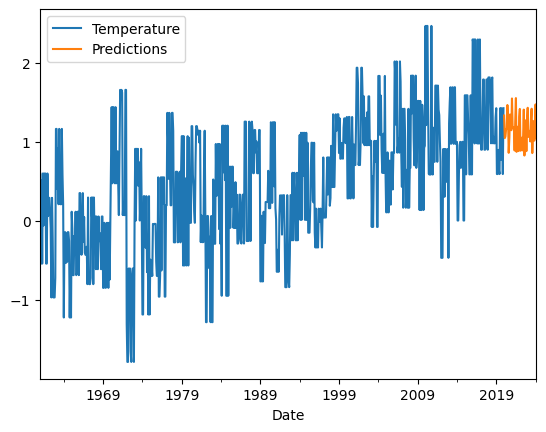

In [30]:
start = len(train)
end = len(train) + 60
predictions = result.forecast(steps=50).rename("Predictions")
train.plot(legend=True)
predictions.plot(legend=True)